In [1]:
import os

In [3]:
os.listdir('./data')

['banking.csv', 'car_evaluation.csv', 'titanic', 'USA_Housing.csv']

In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns

In [9]:
data = pd.read_csv('./data/USA_Housing.csv')

In [10]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<AxesSubplot:>

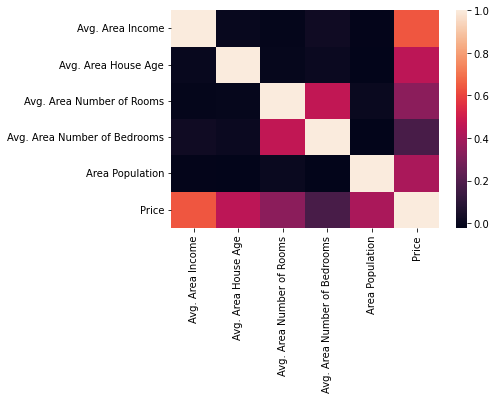

In [17]:
sns.heatmap(data.corr())

In [18]:
feature = data.drop(['Price', 'Address'], axis=1).values
target = data['Price'].values

In [36]:
train, test, train_label, test_label = train_test_split(feature, target, test_size=0.3, random_state=42)

In [41]:
# model 
reg = LinearRegression(fit_intercept=True)

In [42]:
# best fit
model = reg.fit(train, train_label)

In [43]:
model.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [44]:
model.intercept_

-2638673.4261913314

In [45]:
# test
predict = model.predict(test)

In [53]:
mean_squared_error(test_label, predict)

10068422551.401073

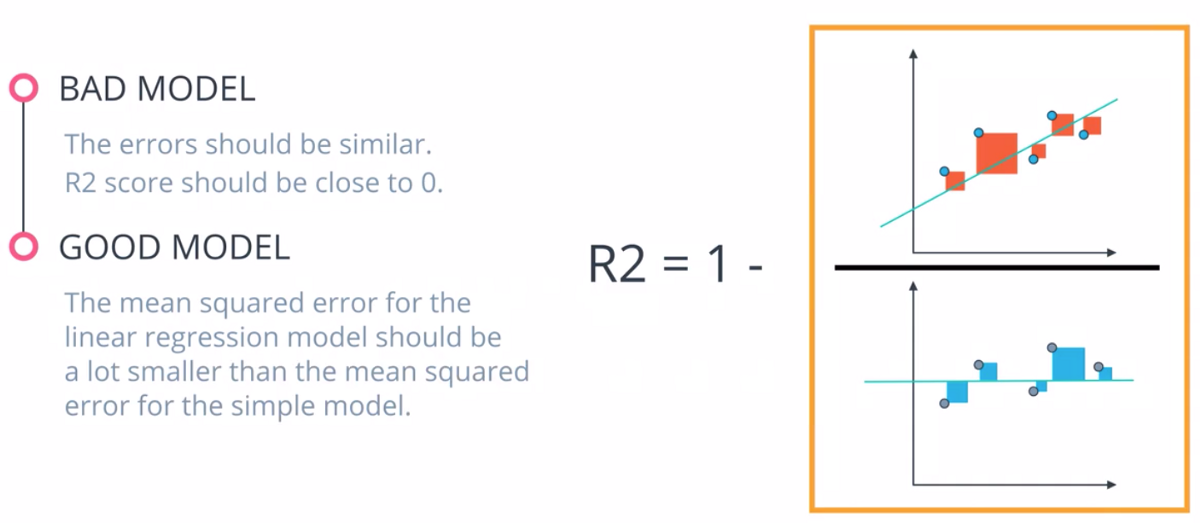

In [54]:
r2_score(test_label, predict)

0.9146818498753999

In [60]:
model.score(test,test_label)

0.9146818498753999

In [66]:
data.Address[3]

'USS Barnett\nFPO AP 44820'